# Task 5

# Description

# The Heart Disease Analysis project involves analysing a dataset related to 
# heart disease to identify key factors that contribute to heart disease 
# occurrence. The goal is to use data analytics techniques to predict the 
# likelihood of heart disease based on various health indicators such as age, 
# cholesterol levels, blood pressure, and other relevant features. The analysis 
# aims to provide insights that can help in early diagnosis and prevention.

# Responsibility
# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Question formulation

# Import Libraries

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot style
sns.set(style='whitegrid')

# Load Dataset

In [9]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Asus\\Downloads\\heart.csv')

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Cleaning

In [12]:
# Check for missing values
df.isnull().sum()

# Summary statistics to check for outliers
df.describe()

# Optional: Remove outliers using IQR (interquartile range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show dataset after cleaning
df_cleaned.shape

(769, 14)

# Exploratory Data Analysis (EDA)

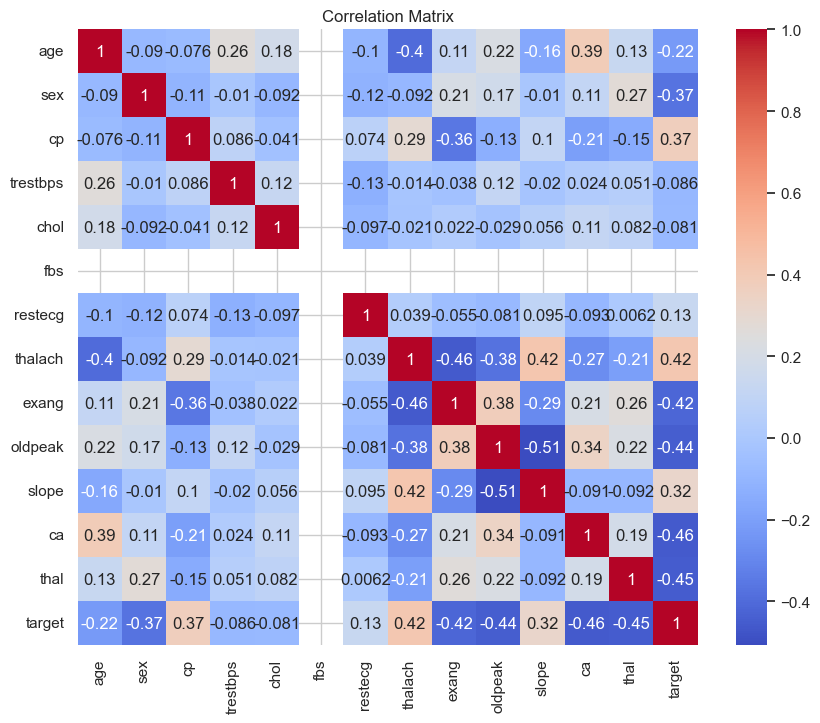

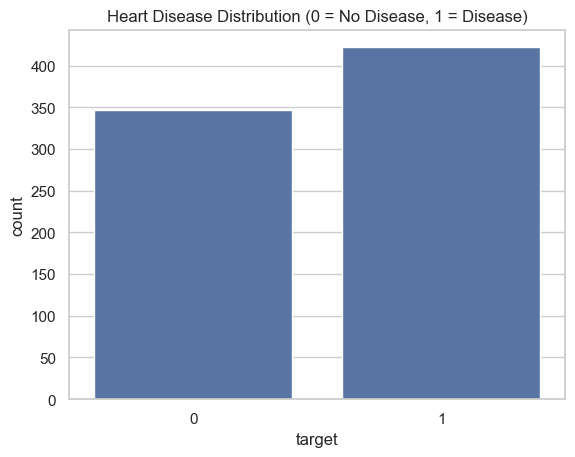

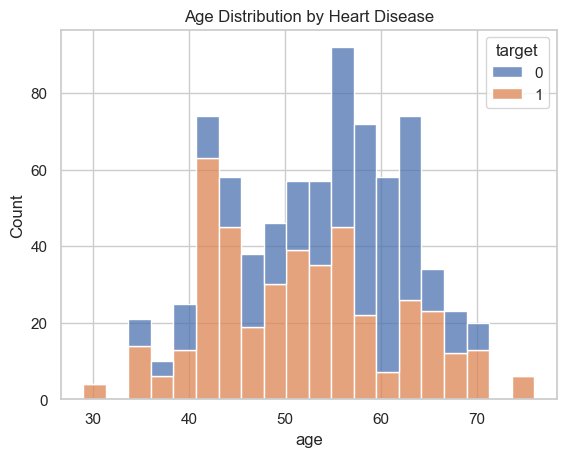

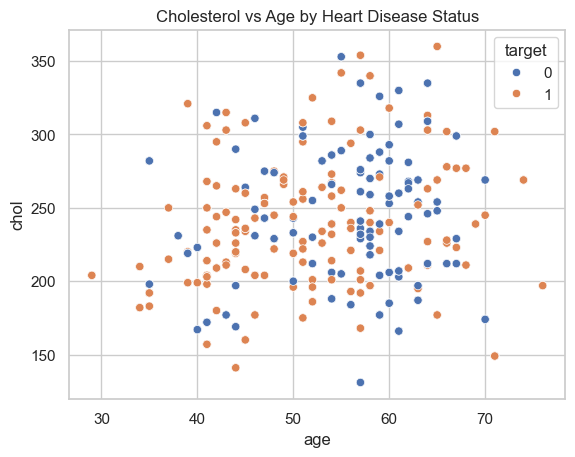

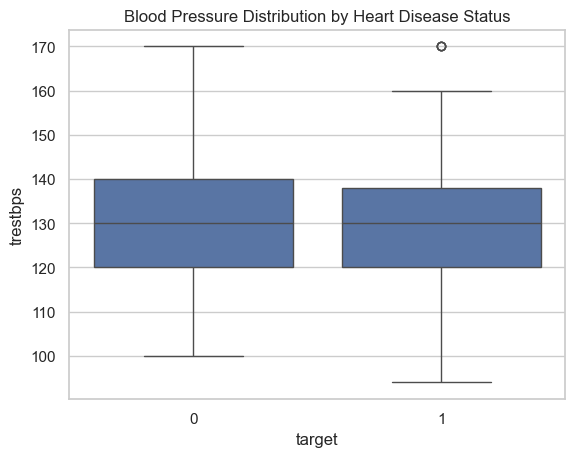

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable (Heart Disease)
sns.countplot(x='target', data=df_cleaned)
plt.title('Heart Disease Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Distribution of Age among heart disease patients
sns.histplot(data=df_cleaned, x='age', hue='target', multiple='stack', bins=20)
plt.title('Age Distribution by Heart Disease')
plt.show()

# Scatter plot: Cholesterol vs Age
sns.scatterplot(x='age', y='chol', hue='target', data=df_cleaned)
plt.title('Cholesterol vs Age by Heart Disease Status')
plt.show()

# Boxplot for blood pressure and heart disease
sns.boxplot(x='target', y='trestbps', data=df_cleaned)
plt.title('Blood Pressure Distribution by Heart Disease Status')
plt.show()

# Data Preprocessing for Modeling

In [18]:
# Separate features and target variable
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Prediction

Accuracy: 85.71%
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        64
           1       0.85      0.92      0.88        90

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



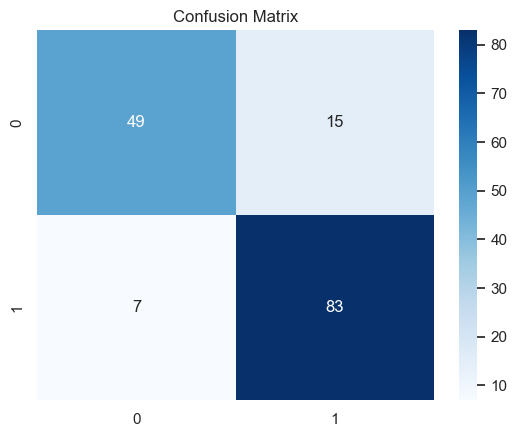

In [21]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()